In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# 导入TensorFlow和tf.keras
import tensorflow as tf
from tensorflow import keras

# 导入辅助库
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

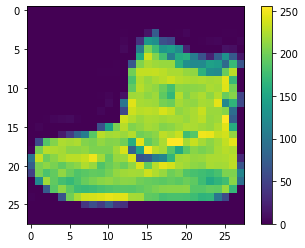

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

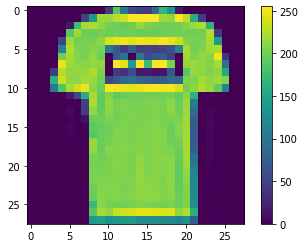

In [12]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

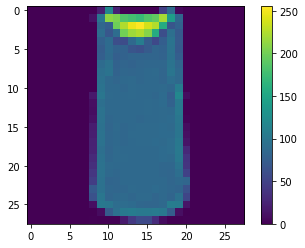

In [13]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

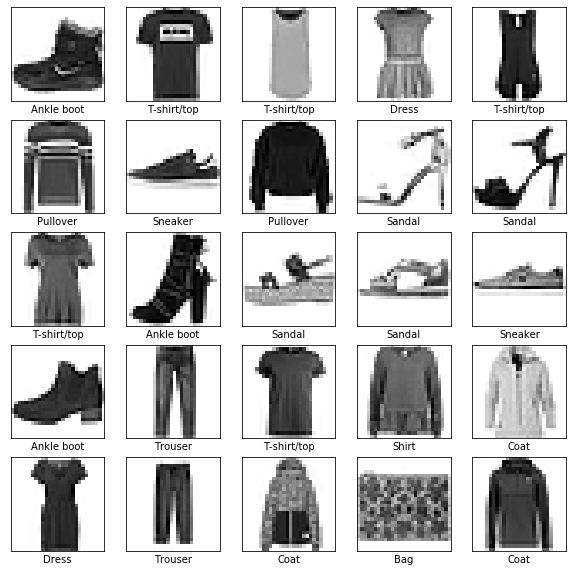

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0626 15:18:27.817542 140197595117376 deprecation.py:506] From /home/yanjun/.local/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 15s 250us/sample - loss: 0.5045 - acc: 0.8210
Epoch 2/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3770 - acc: 0.8641
Epoch 3/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3389 - acc: 0.8776
Epoch 4/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3152 - acc: 0.8830
Epoch 5/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2944 - acc: 0.8905


In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 3s 264us/sample - loss: 0.3807 - acc: 0.8564
Test accuracy: 0.8564


In [24]:
predictions = model.predict(test_images)

In [25]:
predictions[0]

array([8.1553108e-06, 3.2658859e-06, 2.0812518e-06, 6.6850231e-07,
       7.5895896e-06, 3.1644948e-02, 8.5225147e-05, 1.0167968e-01,
       1.2851216e-05, 8.6655557e-01], dtype=float32)

In [26]:
test_labels[0]

9

In [27]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

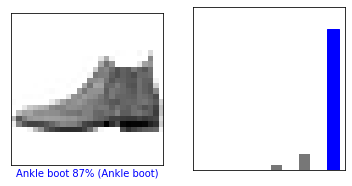

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

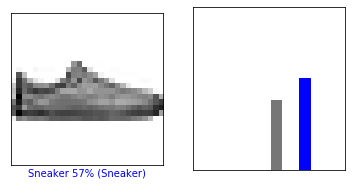

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

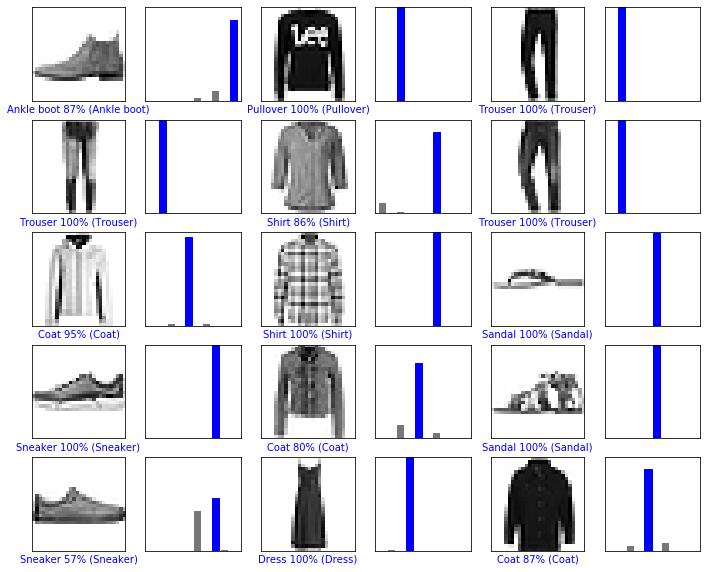

In [30]:
# 绘制前X个测试图像，预测标签和真实标签
# 以蓝色显示正确的预测，红色显示不正确的预测
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [31]:
# 从测试数据集中获取图像
img = test_images[0]
print(img.shape)

(28, 28)


In [32]:
# 将图像添加到批次中，即使它是唯一的成员。
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [33]:
predictions_single = model.predict(img)
print(predictions_single)

[[8.15530439e-06 3.26588338e-06 2.08124834e-06 6.68502480e-07
  7.58957685e-06 3.16448808e-02 8.52250014e-05 1.01679578e-01
  1.28512065e-05 8.66555750e-01]]


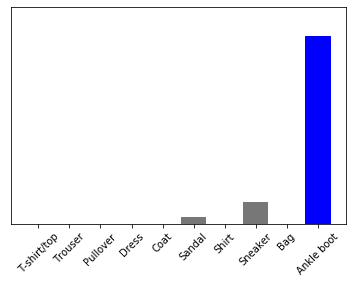

In [34]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [35]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
